# All plots notebook

This notebook contains basically every plot used in the presentation

In [1]:
%load_ext autoreload
%autoreload 2

# neccessary to import modules from src
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from src.scripts.read_parse import read_csv_data, parse_data_remove_useless_cols
from src.scripts.analyze import parse_data_count_based_on_col, display_all_graphs
from src.scripts.visualizations.globe_plotting import plot_global_data, plot_usastate_data
from src.scripts.visualizations.animate_bar_graphs import animate_bar_graphs

## Over time plot gifs

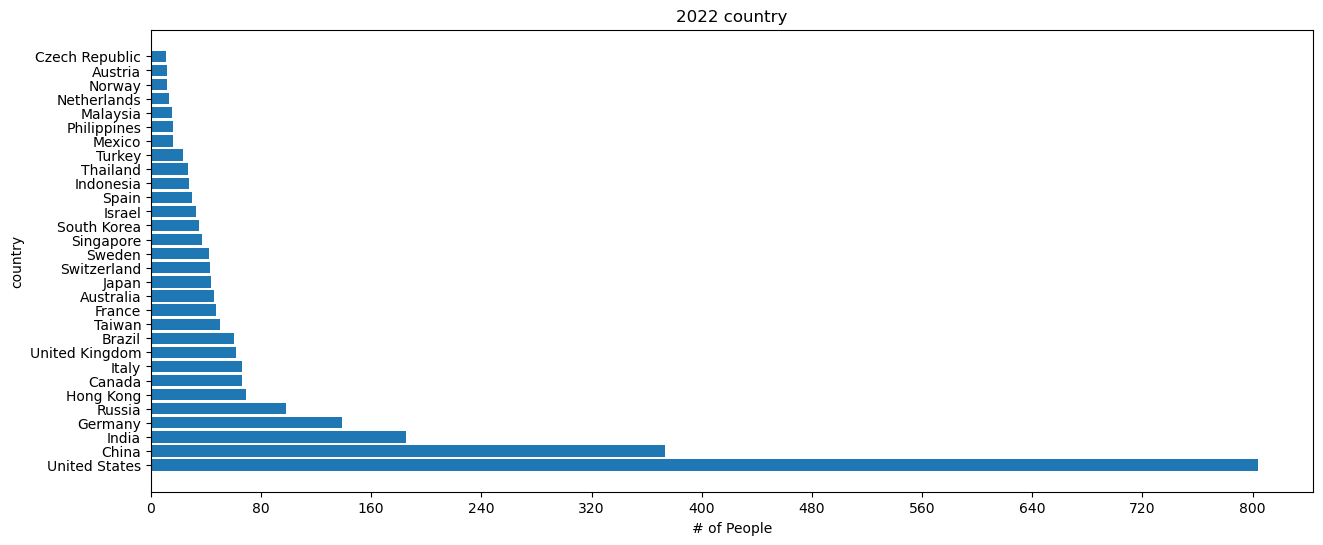

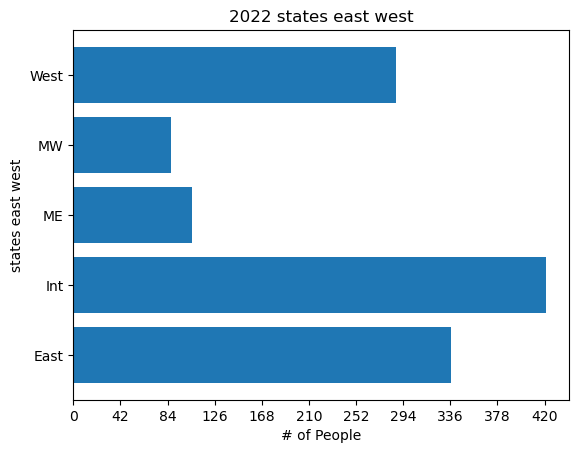

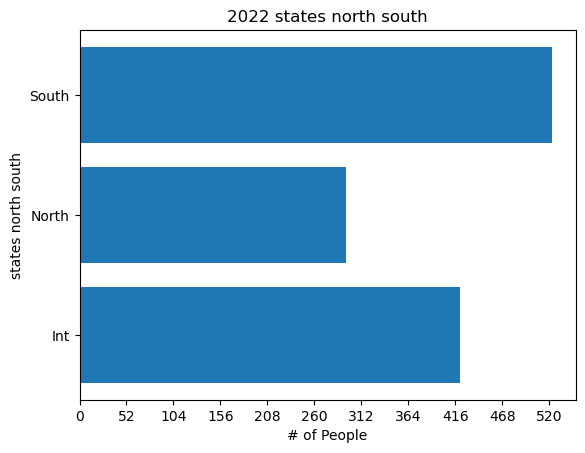

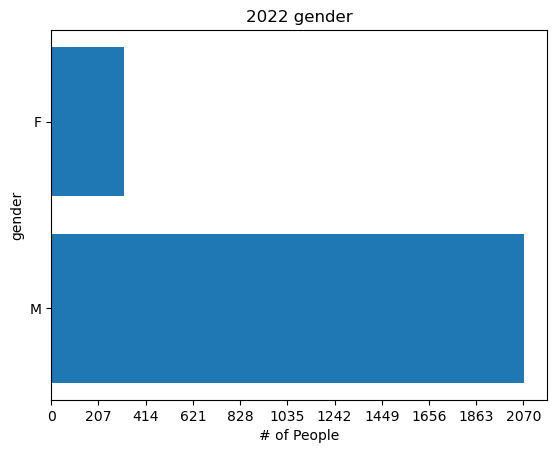

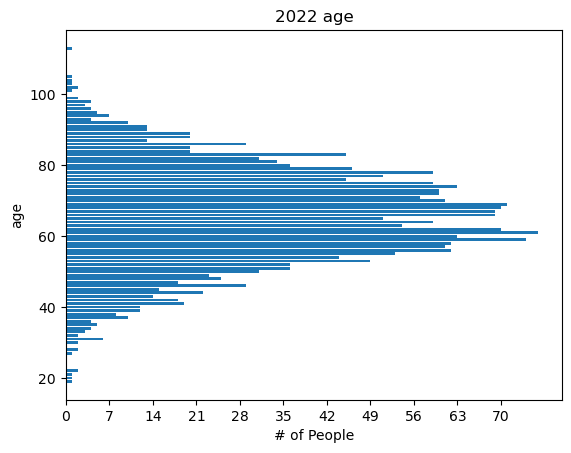

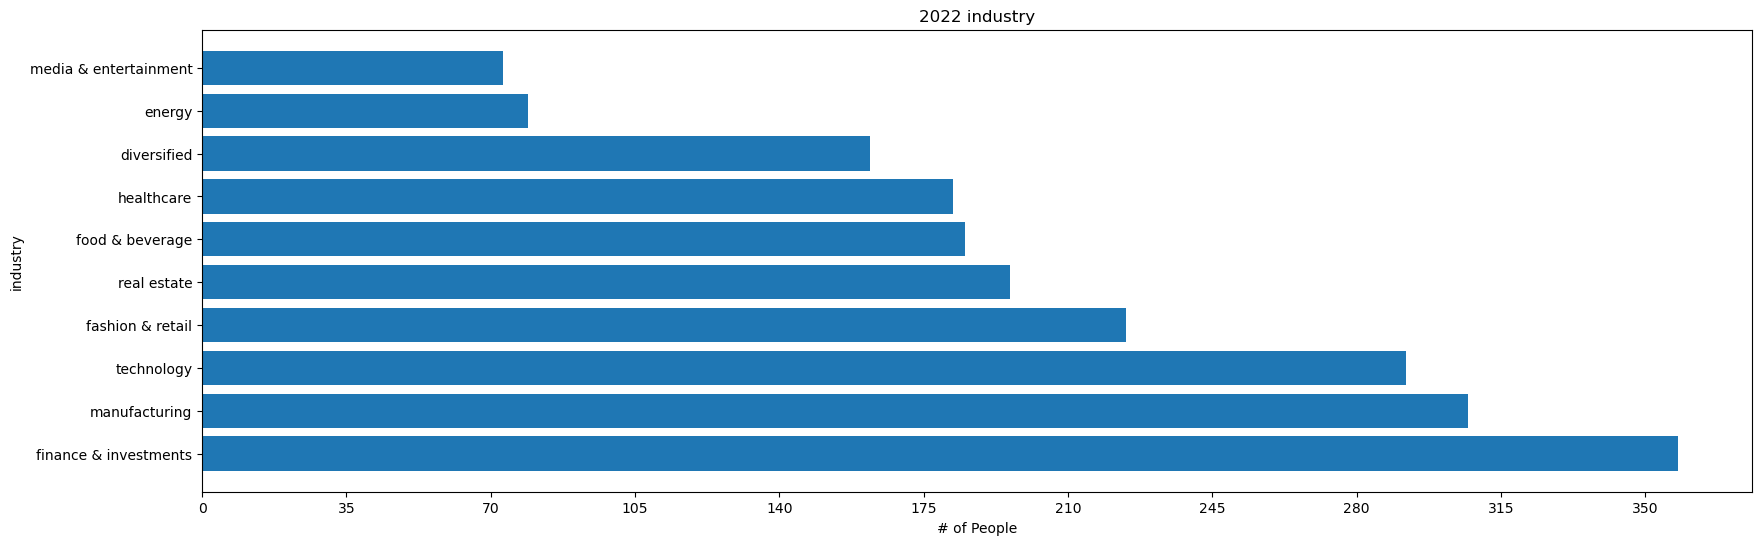

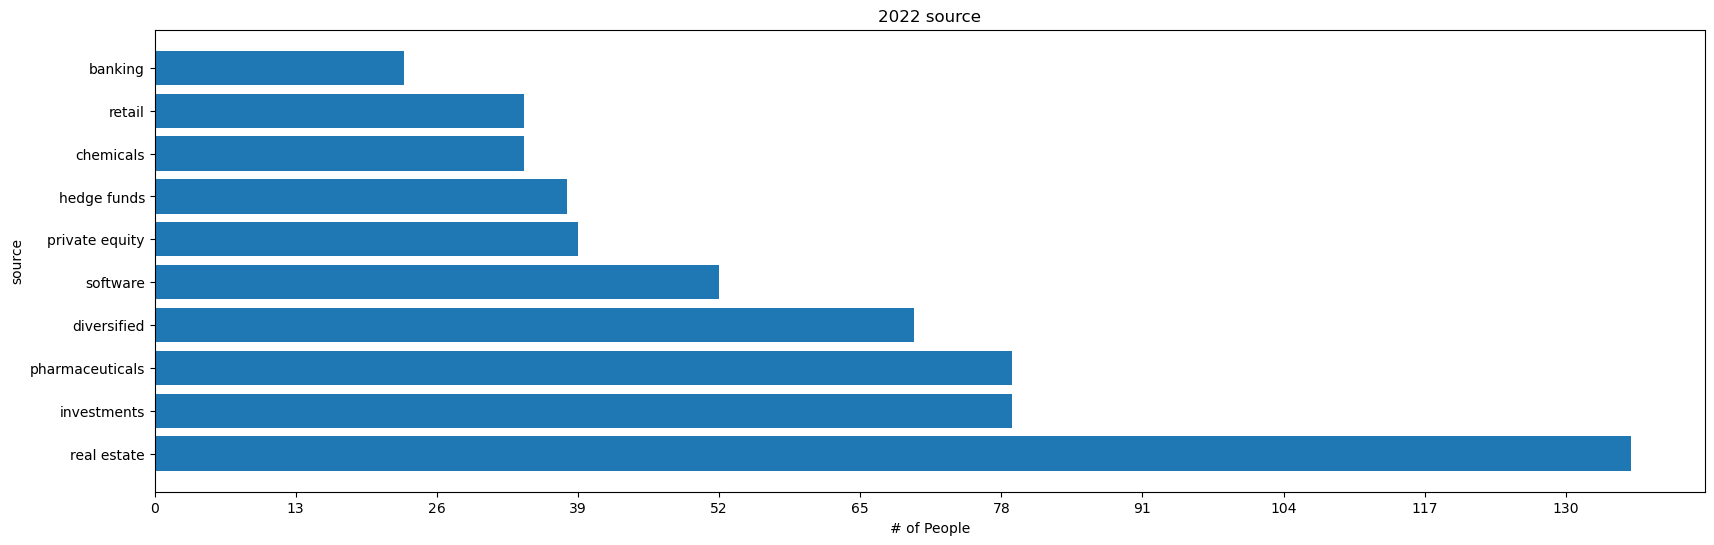

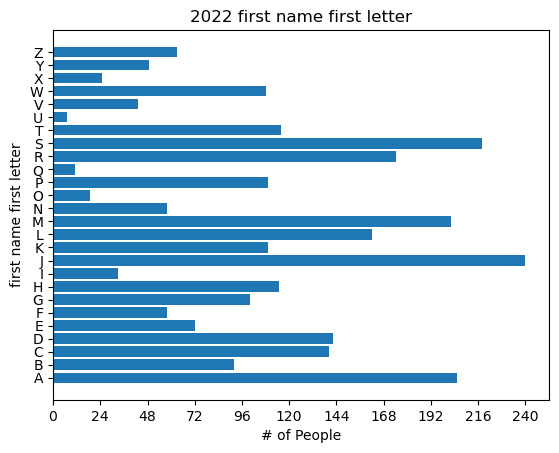

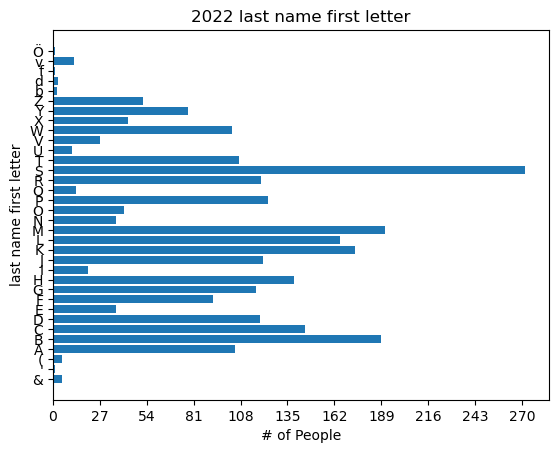

In [3]:
# Define the columns that are important for analysis
important_cols = ['country', 'state', 'gender', 'age', 'industry', 'source', 'name']
# Define the years for analysis
years = [year for year in range(2003, 2023)]
# Initialize an empty dictionary to store categorized DataFrames
dfs = {}
# Iterate over the years to analyze data
for year in years:
    # fetch_and_save_data(year, savedir="../src/data") # if you dont have the data available
    # Read and parse the data for the current year
    data = parse_data_remove_useless_cols(read_csv_data(year, datadir="../src/data"))
    # Parse and count data based on important columns
    allYearData = [parse_data_count_based_on_col(data, col) for col in important_cols]
    # Display all graphs based on the parsed data
    dfs = display_all_graphs(allYearData, dfs)

for key in dfs:
    # Reverse the order of data frames so it starts with earlier years
    dfs[key].reverse()
    # Generate and save animation for each data frame
    animate_bar_graphs(dfs[key], years, key, f"../plots/{key}.gif")

## Map plot heatmaps

In [4]:
year = 2021

billdf = read_csv_data(2021, '../src/data/')
billdf = parse_data_remove_useless_cols(billdf)

# from https://www.statsamerica.org/downloads/default.aspx
uspopcount = pd.read_csv('../src/data/Population Estimates - US, States, Counties.csv')
uspopcount2020 = uspopcount[uspopcount["Year"] == 2020]
usbills = billdf[billdf["country"] == "United States"].dropna(subset=["state", "realTimeWorth"])
usbillsgrouped = usbills.groupby("state").count()
usbills_withpop = pd.merge(usbillsgrouped, uspopcount2020, left_on="state", right_on="Description")
# states = wortbillionsstates.index
states = usbills_withpop["Description"]
# data = wortbillionsstates.values
data = usbills_withpop["position"] / usbills_withpop["Population"]

(<Figure size 800x600 with 2 Axes>, <GeoAxes: >)

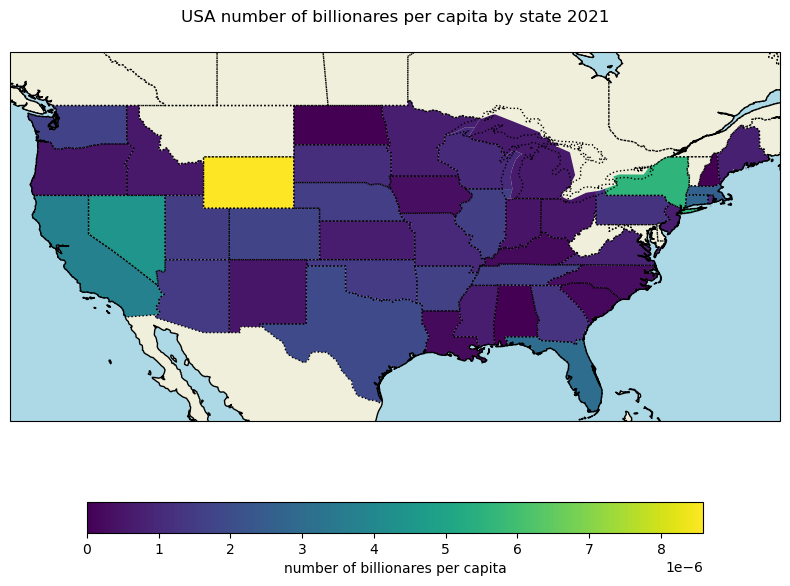

In [5]:
plot_usastate_data(states, data, title="USA number of billionares per capita by state 2021", cbar_label="number of billionares per capita")

In [6]:
# unit is millions of dollars
billdf_summed = billdf.groupby("country").sum()
billdf_summed.head()
globdf = pd.read_csv("../src/data/wealth-est-agg.csv")
globdf_yr = globdf[globdf["year"] == year]
mergeddf = pd.merge(billdf_summed, globdf_yr, on="country")
mergeddf["ratios"] = (mergeddf["realTimeWorth"] * 1000000) / (mergeddf["total wealth"] * 1000000000)
mergeddf_fixed = mergeddf[mergeddf["ratios"] < 0.45]
ratios = mergeddf_fixed["ratios"]
country_name_fix = {
    "Hong Kong": "Hong Kong S.A.R.",
    "Tanzania": "United Republic of Tanzania",
    "United States": "United States of America"
}

(<Figure size 800x600 with 2 Axes>, <GeoAxes: >)

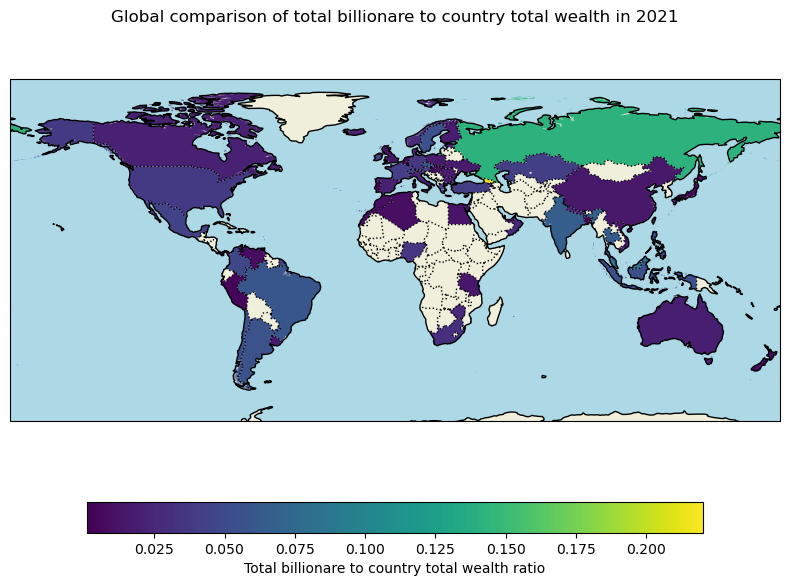

In [7]:
plot_global_data(
    mergeddf_fixed["country"], ratios, country_name_map=country_name_fix,
    title="Global comparison of total billionare to country total wealth in 2021",
    cbar_label="Total billionare to country total wealth ratio"
)

## Country, USA, California bar chart and pie chart distributions

In [8]:
file_path = '../src/data/billionaires_2020.csv'
file_path_1='../src/data/population_by_country_2020.csv'
file_path_2='../src/data/forbes_2022_billionaires.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)
df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

In [9]:
# Group the data by country and count the number of billionaires in each country
country_counts = df['country'].value_counts()

# Select the top N countries with the most billionaires
top_countries = country_counts.head(10)  

list1 = []
list2 = []
populationlist = [331341050, 1440297825, 1382345085, 83830972, 145945524, 7507523, 212821986, 60446035, 37799407, 67948282]
for i in range (0,len(top_countries)):
    list1.append(top_countries[i]/populationlist[i])
    list2.append(top_countries.index[i])

/var/folders/1n/b2_3gqts5wq23bs7yfyq3fvr0000gn/T/ipykernel_4239/3409386251.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  list1.append(top_countries[i]/populationlist[i])


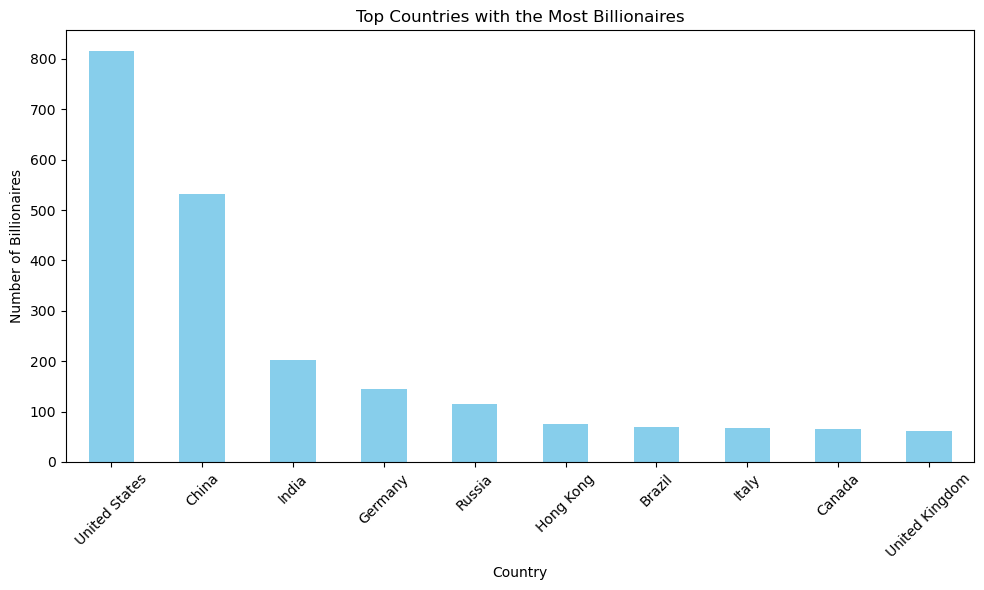

In [10]:
# Plot the bar graph
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top Countries with the Most Billionaires')
plt.xlabel('Country')
plt.ylabel('Number of Billionaires')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

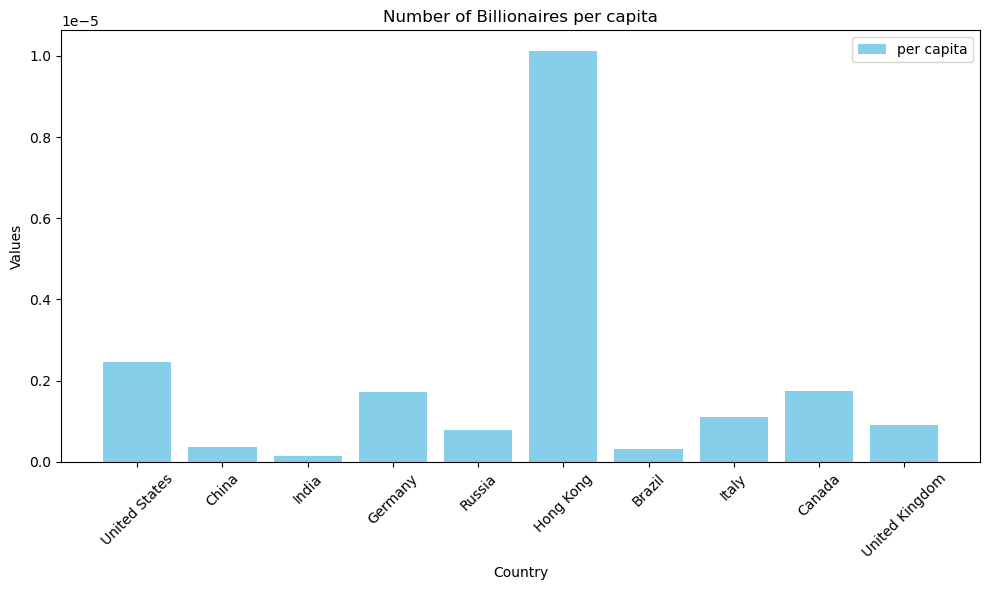

In [11]:
# Plotting the bar graph
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(list2, list1, color='skyblue', label='per capita')
#plt.bar(categories, values2, color='red', label='Values 2', alpha=0.5)  # Using alpha to make it transparent

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Values')
plt.title('Number of Billionaires per capita')
plt.legend()  # Show legend

# Show plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

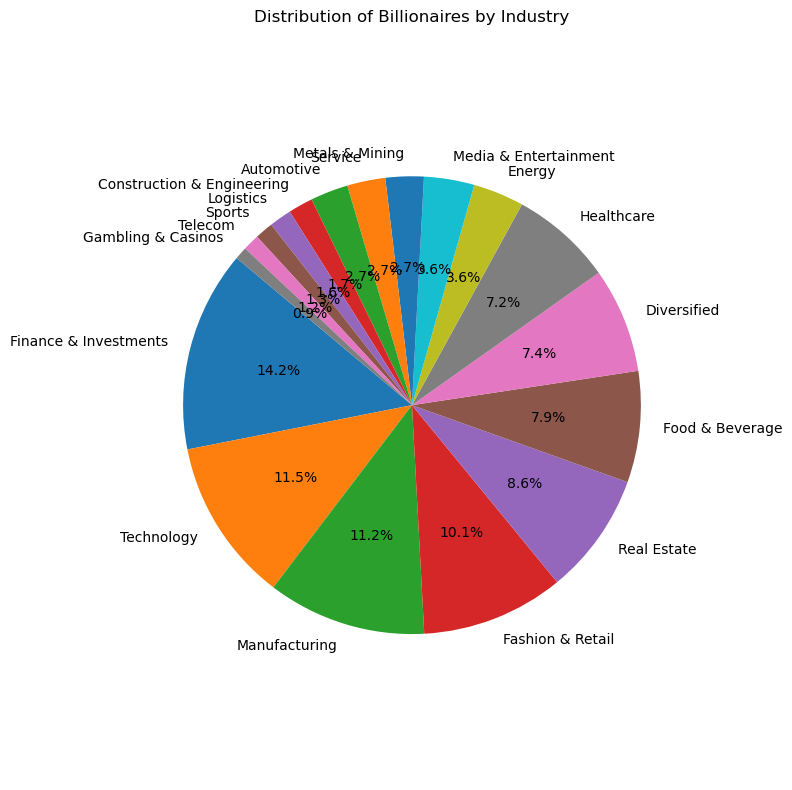

In [12]:
industry_counts = df['industry'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
industry_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Billionaires by Industry')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

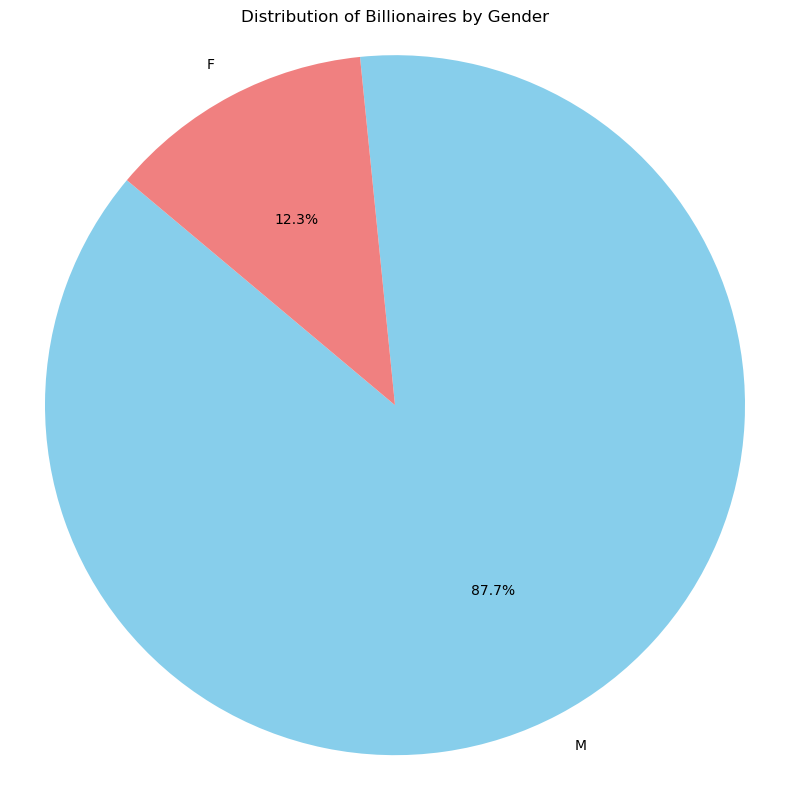

In [13]:
gender_counts = df['gender'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Billionaires by Gender')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

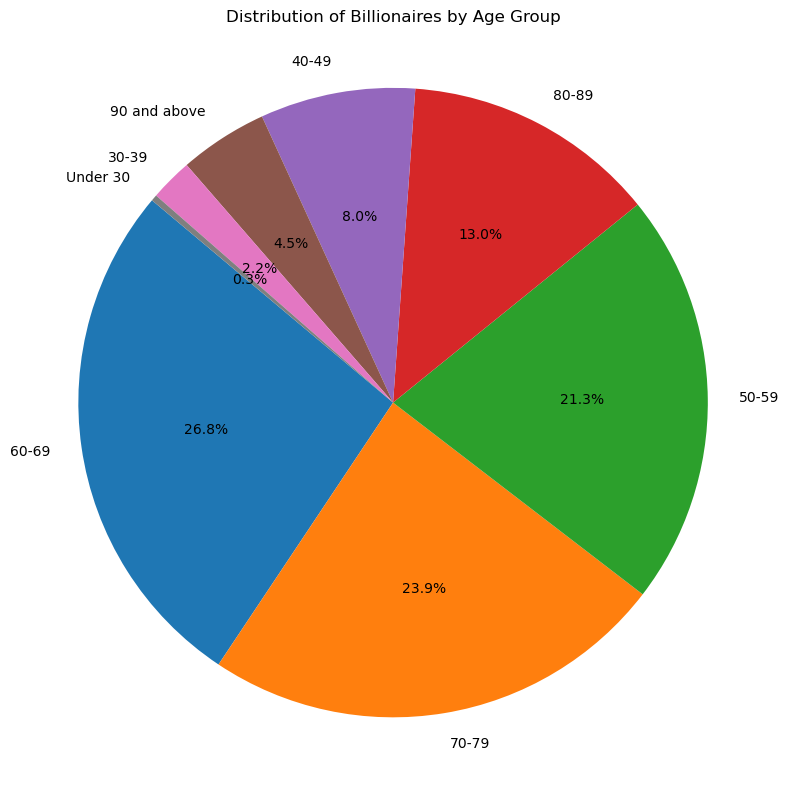

In [14]:
# Define age categories
age_bins = [0, 30, 40, 50, 60, 70, 80, 90, float('inf')]
age_labels = ['Under 30', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90 and above']

# Categorize ages into bins
df['age_category'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Group the data by age category and count the number of occurrences in each category
age_category_counts = df['age_category'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
age_category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Billionaires by Age Group')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

In [15]:
# Filter the DataFrame to include only female billionaires
female_df = df[df['gender'] == 'F']

# Group the filtered DataFrame by country
female_country_counts = female_df['country'].value_counts()

# Calculate the proportion of female billionaires in each country
proportions = female_country_counts / df['country'].value_counts()

# Identify the countries with the highest and lowest proportions
country_with_highest_proportion = proportions.idxmax()
country_with_lowest_proportion = proportions.idxmin()

# Print the results
print(f"Country with the highest proportion of female billionaires: {country_with_highest_proportion}")
print(f"Country with the lowest proportion of female billionaires: {country_with_lowest_proportion}")

Country with the highest proportion of female billionaires: Angola
Country with the lowest proportion of female billionaires: Russia


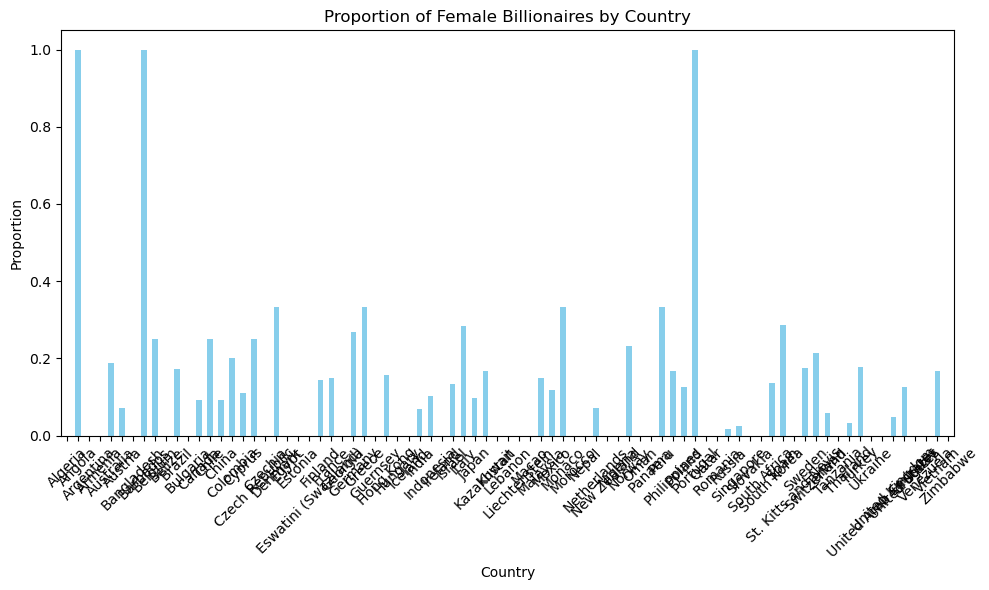

In [16]:
# Optionally, visualize the proportions
plt.figure(figsize=(10, 6))
proportions.plot(kind='bar', color='skyblue')
plt.title('Proportion of Female Billionaires by Country')
plt.xlabel('Country')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

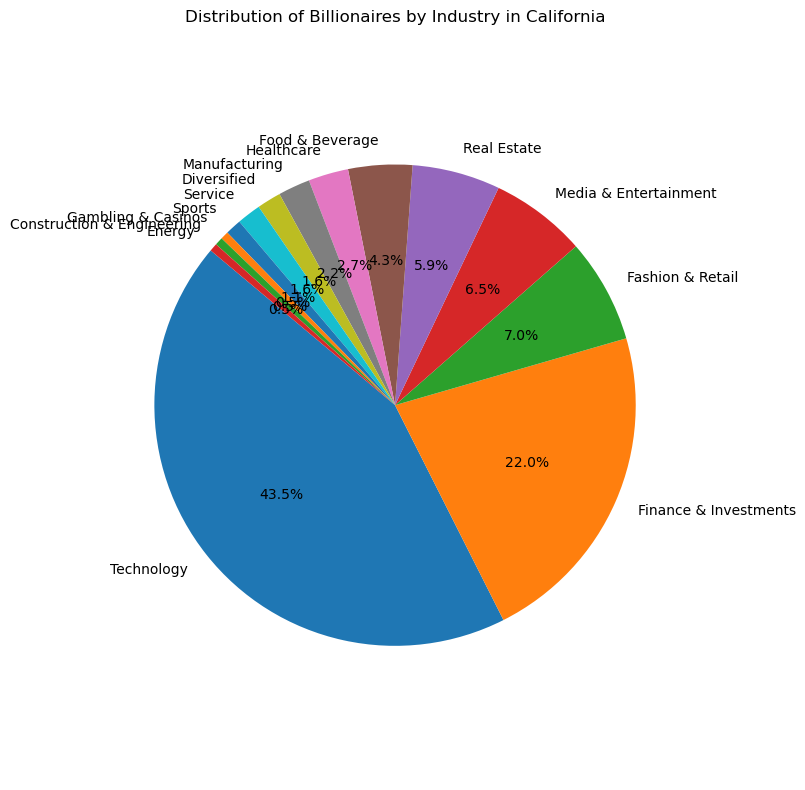

In [17]:
df_filtered = df2[df2['state'].notna() & (df2['state'] == 'California')]
industry_counts = df_filtered['category'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
industry_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Billionaires by Industry in California')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

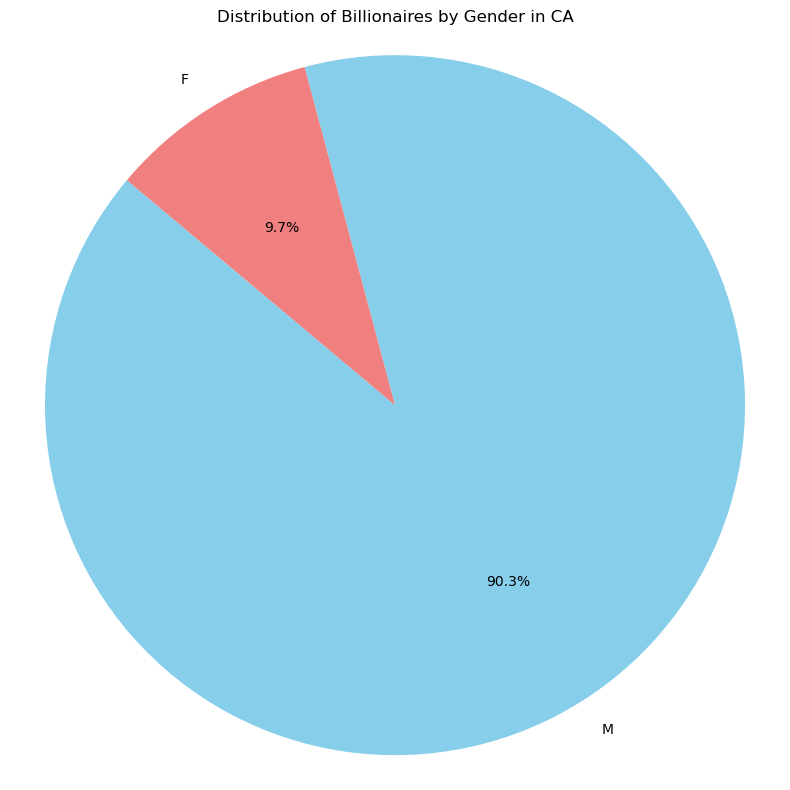

In [18]:
gender_counts = df_filtered['gender'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Billionaires by Gender in CA')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

/var/folders/1n/b2_3gqts5wq23bs7yfyq3fvr0000gn/T/ipykernel_4239/1772255919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['age_category'] = pd.cut(df_filtered['age'], bins=age_bins, labels=age_labels, right=False)


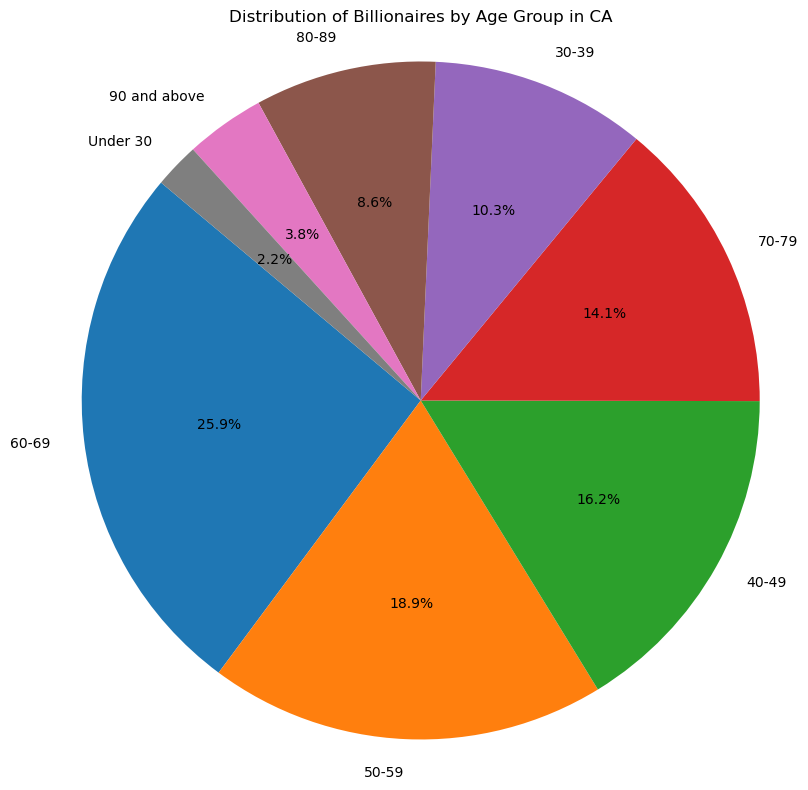

In [19]:
# Categorize ages into bins
df_filtered['age_category'] = pd.cut(df_filtered['age'], bins=age_bins, labels=age_labels, right=False)

# Group the data by age category and count the number of occurrences in each category
age_category_counts1 = df_filtered['age_category'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
age_category_counts1.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Billionaires by Age Group in CA')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

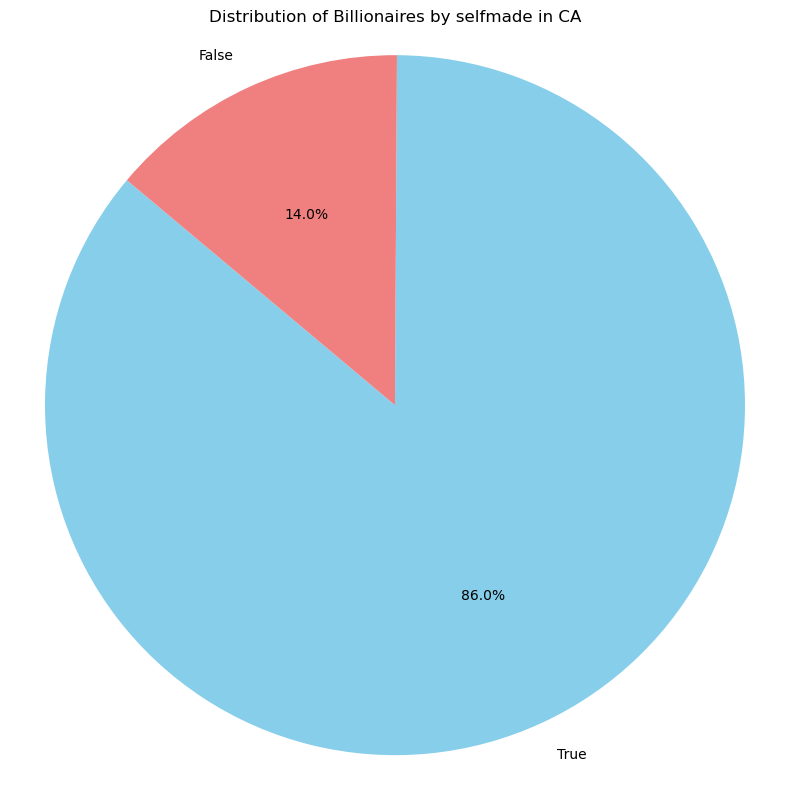

In [20]:
selfmade_counts = df_filtered['selfMade'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
selfmade_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Billionaires by selfmade in CA')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

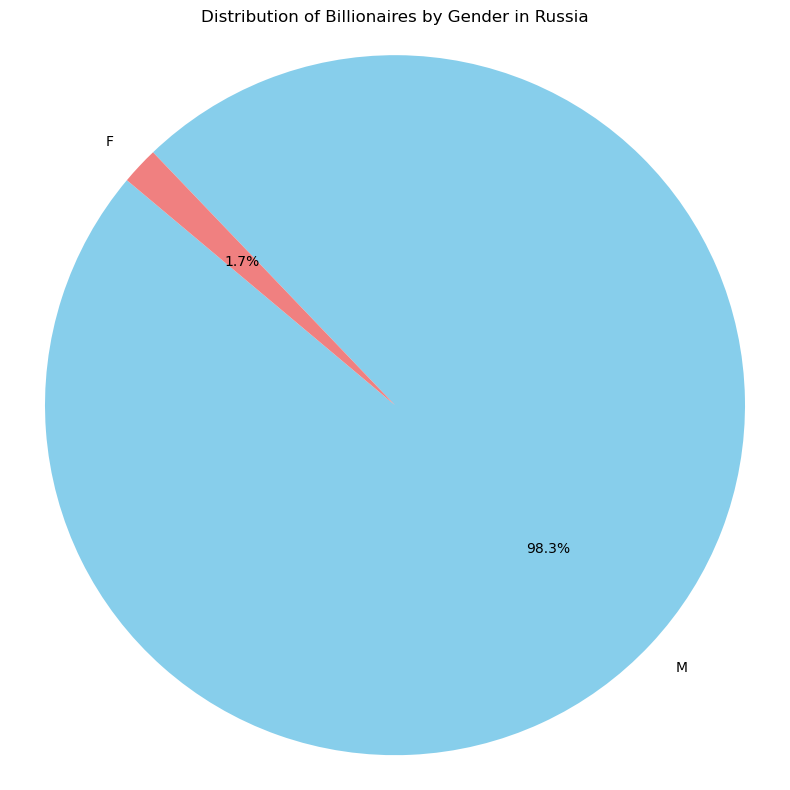

In [21]:
df_filteredRussia = df[(df['country'] == 'Russia')]
# Filter the DataFrame to include only female billionaires
female_df = df_filteredRussia[df_filteredRussia['gender'] == 'F']
gender_counts = df_filteredRussia['gender'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Billionaires by Gender in Russia')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

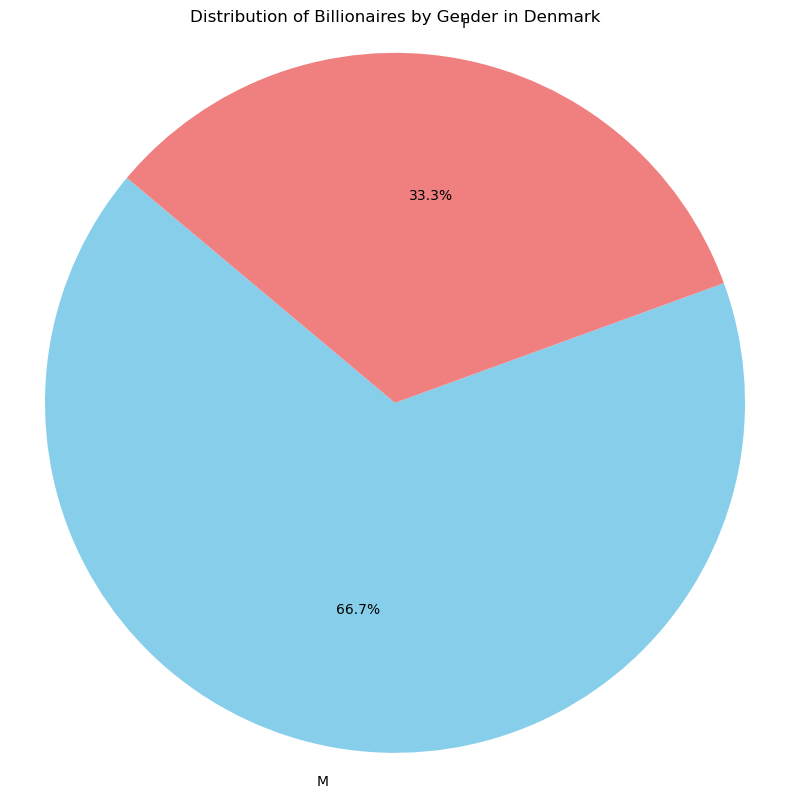

In [22]:

df_filteredDenmark = df[(df['country'] == 'Denmark')]
# Filter the DataFrame to include only female billionaires
female_df = df_filteredDenmark[df_filteredDenmark['gender'] == 'F']
gender_counts = df_filteredDenmark['gender'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Billionaires by Gender in Denmark')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()